In [47]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font = fm.FontProperties(fname='./BMJUA_ttf.ttf').get_name()
plt.rc('font', family=font)

In [34]:
data = pd.read_csv('TB_RECIPE_SEARCH-210630.csv', encoding='cp949')
cols = ['레시피일련번호', '레시피제목', '요리명', '등록자ID', '등록자명', '조회수', '추천수', '스크랩수', '요리방법별명', 
'요리상황별명', '요리재료별명', '요리종류별명', '요리소개', '요리재료내용', '요리인분명', '요리난이도명', '요리시간명',
'최초등록일시']

data.columns = cols

In [37]:
fast_recipe = data.query('요리시간명 in ["5분이내", "10분이내", "15분이내"]').reset_index(drop=True)

In [38]:
fast_recipe.to_csv('fast_recipe.csv', index=False, encoding='cp949')

In [141]:
import squarify

def plot_square(col_name):
    fig, ax = plt.subplots(figsize=(16, 14))
    df = fast_recipe.value_counts(col_name)
    df = df.to_frame().astype(str).assign(label = lambda x: x.index + '(' + x[0] + ')')
    values = df[0].astype(float)
    label = df.label
    # color = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58']

    squarify.plot(values, label=label, 
    #               color=color, 
                  pad=0.2, 
                   text_kwargs={'color':'black', 'weight':'bold', 'size' : 15}, ax=ax)

    plt.title(col_name+'(빈도)', size=20)
    ax.axis('off')
    plt.show()

In [132]:
fast_recipe.head(1)

,레시피일련번호,레시피제목,요리명,등록자ID,등록자명,조회수,추천수,스크랩수,요리방법별명,요리상황별명,요리재료별명,요리종류별명,요리소개,요리재료내용,요리인분명,요리난이도명,요리시간명,최초등록일시
0,221101,스팸 샌드위치 만들기,스팸샌드위치,skfo0701,박꽃나래,27815,10,95,기타,도시락,밀가루,빵,보통 스팸은 그냥 구워서 밥에만 올려먹잖아요~ 하지만 샌드위치로 만들어 먹으면 더~...,[재료] 스팸 싱글 1팩| 샌드위치용 식빵2쪽| 토마토 1개| 상추 2쪽| 치즈 1...,1인분,초급,15분이내,20071012223908


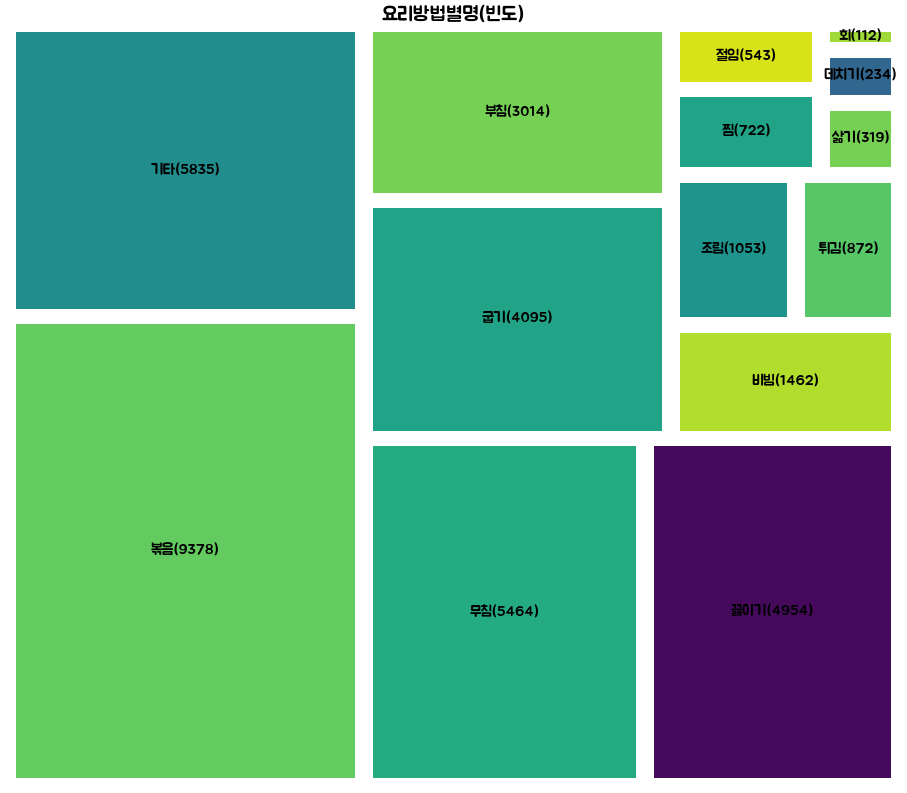

In [133]:
plot_square('요리방법별명')

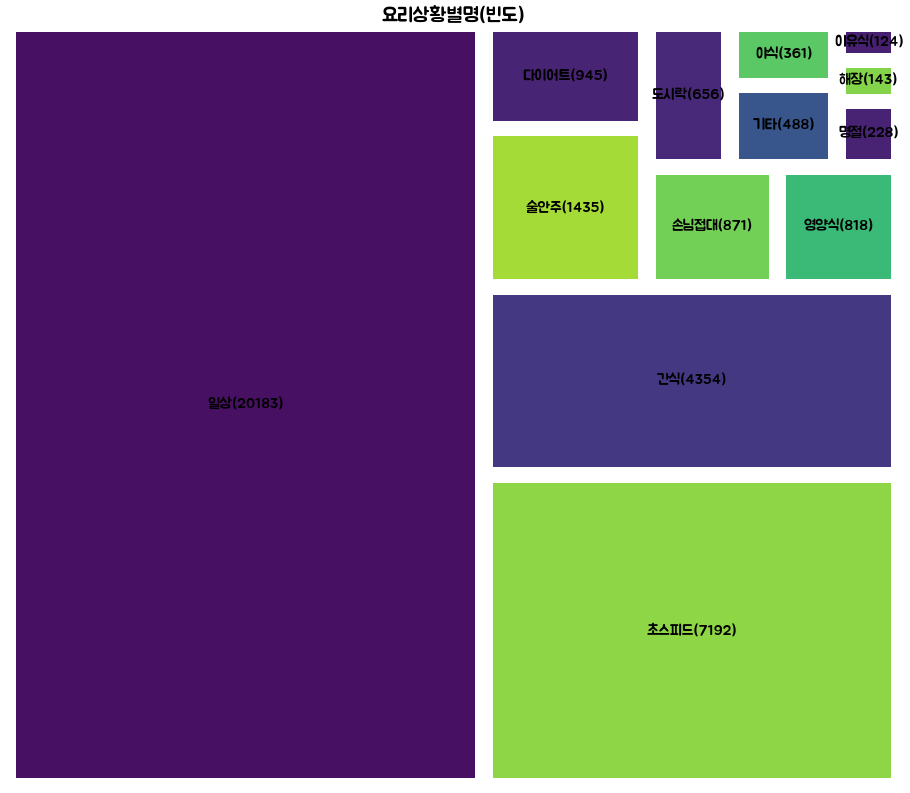

In [134]:
plot_square('요리상황별명')

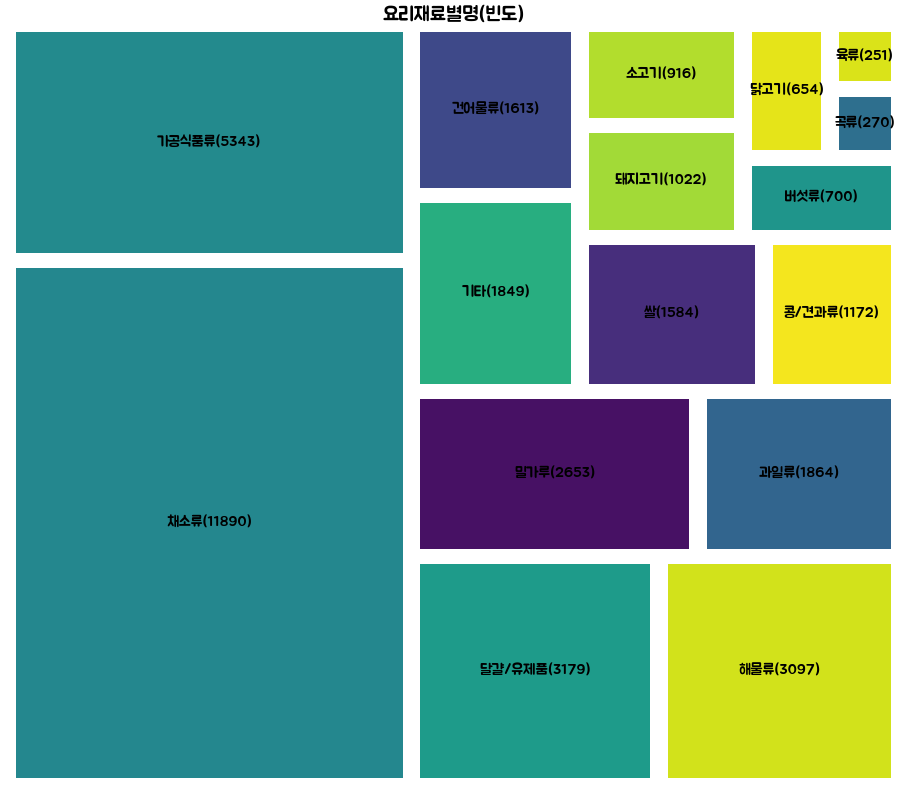

In [135]:
plot_square('요리재료별명')

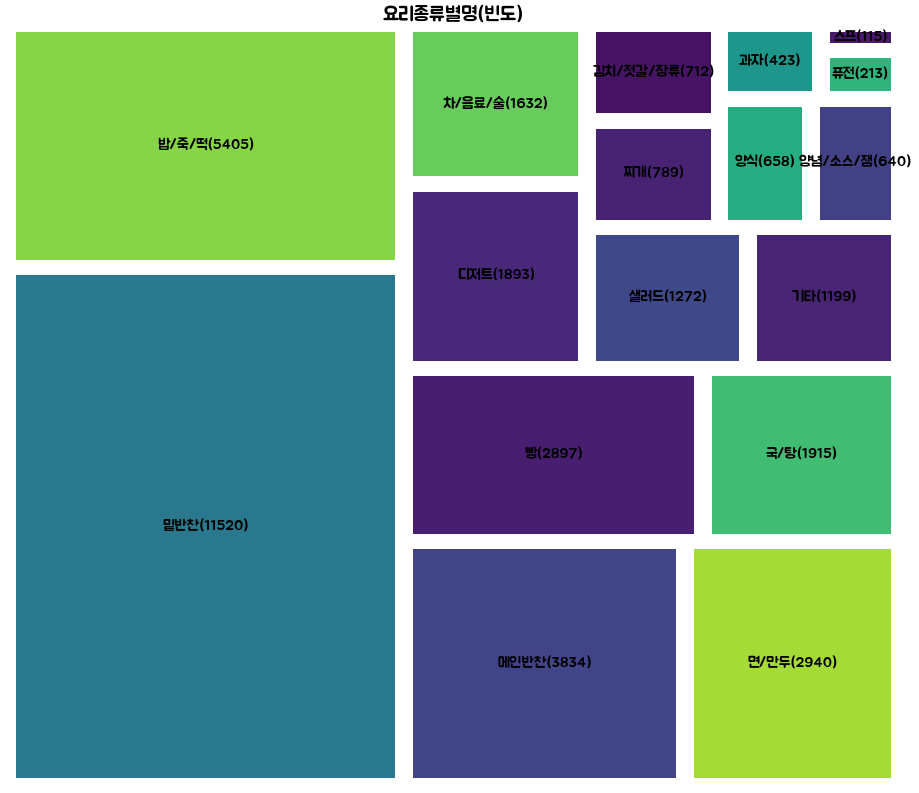

In [136]:
plot_square('요리종류별명')

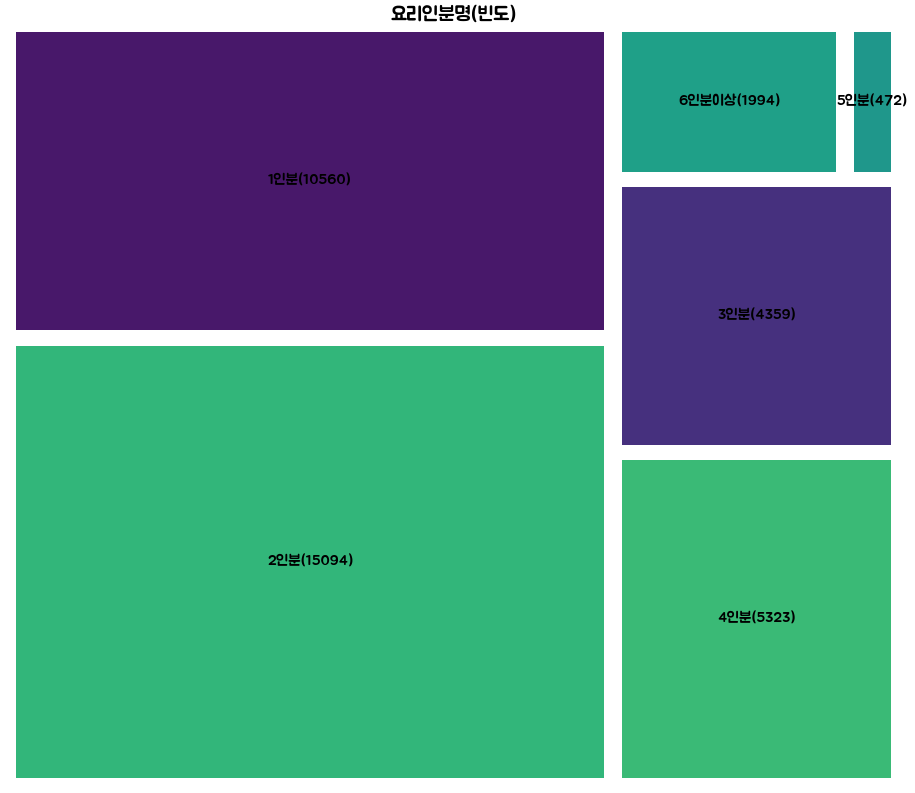

In [137]:
plot_square('요리인분명')

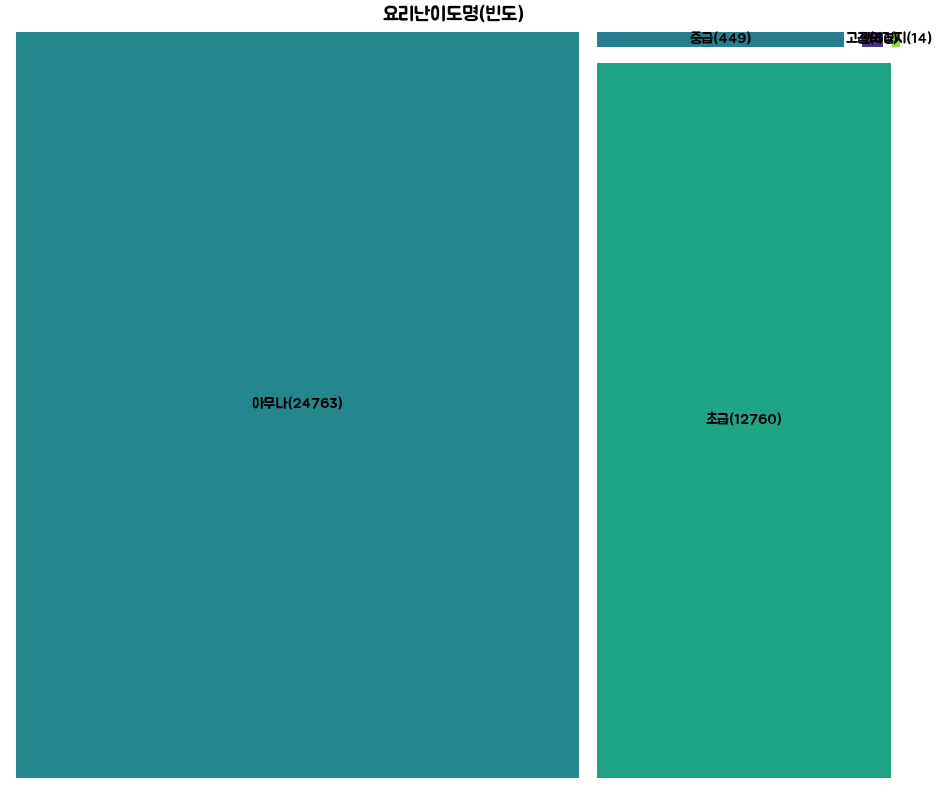

In [138]:
plot_square('요리난이도명')

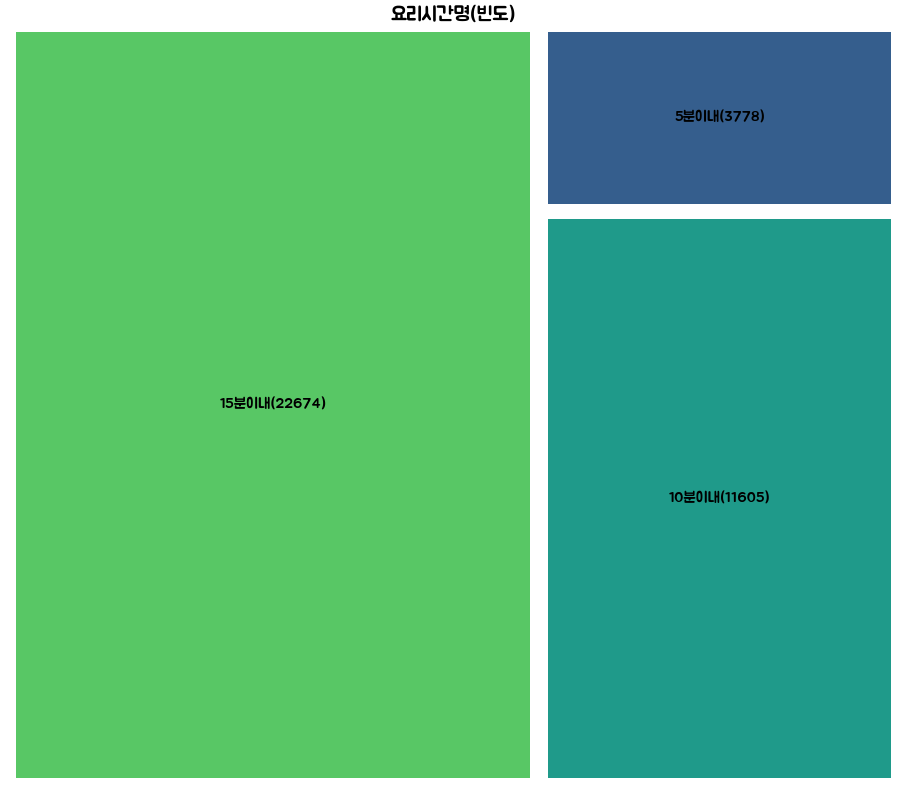

In [139]:
plot_square('요리시간명')